# 1. Introduction

## 1.1 About Dataset

The data used is avocado price dataset from https://www.kaggle.com/datasets/neuromusic/avocado-prices
The data itself is sourced from Hass Avocado Board, who in their website identifies themselves as "the only avocado organization that equips the entire global industry for success by collecting, focusing and distributing investments to maintain and expand demand for avocados in the United States."

## 1.2 Project Objective

The objective of this project is to analyze avocado prices based on the data provided, seek beneficial insight, and create a machine learning algorithm to predict the avocado price.

# 2. Data Exploration

## 2.1 Data Preparation

In [1]:
# Basic data library

import numpy as np
import pandas as pd

# To hide warnings
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Load dataset
df = pd.read_csv('avocado.csv')
df_ori = df.copy()

In [3]:
# see the first 5 rows
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Basic Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### Information From Data Source:

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

### Observation:

1. "Unnamed: 0" should've been the index column. Can be dropped.
2. "Date" is in strings and in weekly period. Should be changed to datetime for easier interpretation and manipulation.
3. Average Price, Total Volume, 4046, 4225, 4770 in numeric data type. Good.
4. "Type" and "Region" is in string. Categorical data. Can be encoded.
5. "Year" is already stated in "Date" column. Can be dropped.
6. No apparent missing value. Can be confirmed later.
7. The 'bags' seems irrelevant since we only have avocado price and types. 

In [5]:
# Dropping redundant columns.

df = df.drop(['Unnamed: 0', 'year'], axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [6]:
# Change date to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%Y/%m/%d")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 1.7+ MB


In [8]:
# Duplicated Data check
df.duplicated().sum()

0

Data is good! Let's move on

### 2.1.1 Statistical Summary of Data

In [9]:
# Get the column names
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region'],
      dtype='object')

In [10]:
# Create list of categorical and numerical columns

categorical = ['type',
       'region']

numerical = ['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

In [11]:
# Descriptive Statistics

df[numerical].describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


In [12]:
# Descriptive statistics of categorical data

df[categorical].describe()

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


In [13]:
# Descriptive information about the date within the data

df['Date'].value_counts()

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64

#### Observation:

1. Most columns seems to be positively skewed.
2. There's a huge gap between min and max value. Should be normalized before modelling.
3. "type" only have 2 unique values. Can be encoded directly using binary encoding.
4. "region" have 54 unique values. Should be binned before further encoding.
5. Date ranged from 2015 to Q1 2018

In [14]:
df.reset_index()

,index,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico
18245,18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico
18246,18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico
18247,18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico


In [15]:
df['Date'].shape

(18249,)

## 2.2 Univariate Analysis

### 2.2.1 Outlier Detection

In [16]:
# Import visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

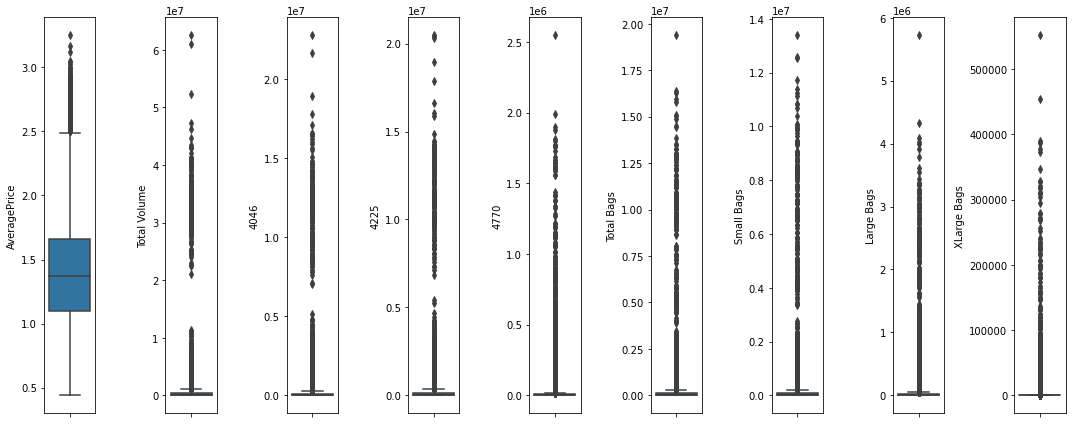

In [17]:
# Use Boxplot to detect outliers

plt.figure(figsize=(15,6))

for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y=df[numerical[i]])
    plt.tight_layout()

And boy, look at that!

Apparently we can't use boxplot to detect outliers. The value gap are simply too large. Let's see if we can do something with scatterplot and histogram.

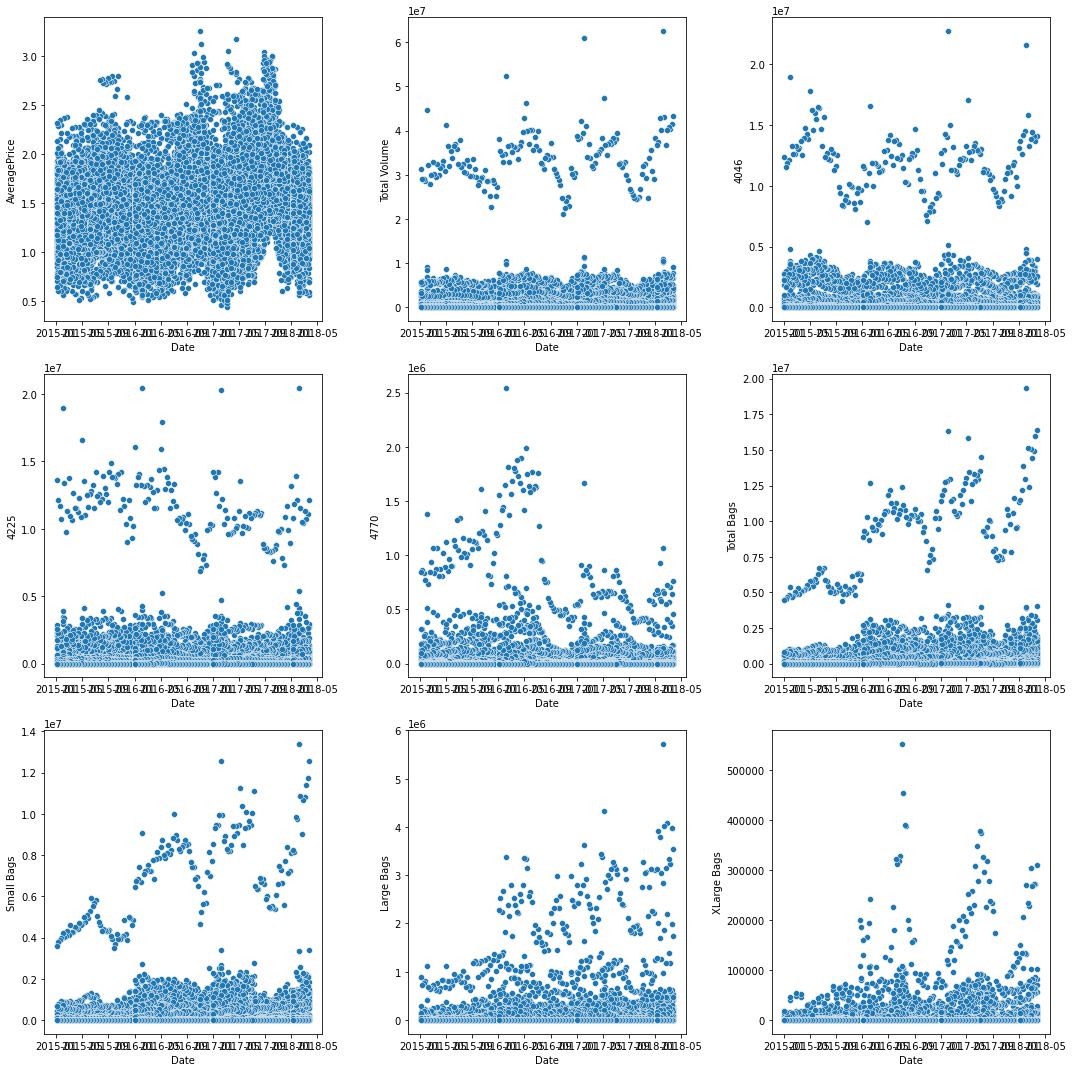

In [18]:
# Use scatterplot to detect outliers

plt.figure(figsize=(15,15))

for i in range(0, len(numerical)):
    plt.subplot(3, len(numerical)//4 + 1, i+1)
    sns.scatterplot(x=df['Date'],y=df[numerical[i]])
    plt.tight_layout()

#### Observation:

1. No outliers in "AveragePrice"
2. In "Total Volume", the outliers seems to be above 2e7.
3. For '4046', '4225', the outliers seems to be above 0.5e7 while for '4770' the outliero seems to be above 0.5e6
4. For "Total Bags" and "Small Bags" the outliers seems to be above 0.3e7.
5. For "Large Bags" the outliers seems to be above 1.5e6
6. For "XLarge Bags" the outliers seems to be above 150k.

### 2.2.2 Outlier Percentage

In [19]:
# Calculating outlier percentage from each column

table = {
    'Total Outliers' : [],
    'Outlier Percentage' : [],
}

totalRow = df.shape[0]

dataFilter = df['Total Volume'] > 2.0e7
table['Total Outliers'].append(df[dataFilter].shape[0])
table['Outlier Percentage'].append(df[dataFilter].shape[0]/totalRow)

avocadoType = ['4046', '4225']

for avotype in avocadoType:
    typefilter = df[avotype] > 0.5e7
    table['Total Outliers'].append(df[typefilter].shape[0])
    table['Outlier Percentage'].append(df[typefilter].shape[0]/totalRow)

dataFilter = df['4770'] > 0.5e6
table['Total Outliers'].append(df[dataFilter].shape[0])
table['Outlier Percentage'].append(df[dataFilter].shape[0]/totalRow)
    
bags = ['Total Bags', 'Small Bags']
    
for bagtype in bags:
    typefilter = df[bagtype] > 0.30e7
    table['Total Outliers'].append(df[typefilter].shape[0])
    table['Outlier Percentage'].append(df[typefilter].shape[0]/totalRow)
    
dataFilter = df['Large Bags'] > 1.5e6
table['Total Outliers'].append(df[dataFilter].shape[0])
table['Outlier Percentage'].append(df[dataFilter].shape[0]/totalRow)

dataFilter = df['XLarge Bags'] > 150000
table['Total Outliers'].append(df[dataFilter].shape[0])
table['Outlier Percentage'].append(df[dataFilter].shape[0]/totalRow)

outlierDF = pd.DataFrame(table)
outlierDF

,Total Outliers,Outlier Percentage
0,169,0.009261
1,170,0.009316
2,171,0.009370
3,164,0.008987
4,205,0.011233
5,172,0.009425
6,123,0.006740
7,57,0.003123


The outliers are only a small part of the data. These can be dropped

### 2.2.3 Dropping Outliers

In [20]:
dataFilter = df['Total Volume'] > 2.0e7
df = df[~dataFilter]

for avotype in avocadoType:
    typefilter = df[avotype] > 0.5e7
    df = df[~typefilter]
    
dataFilter = df['4770'] > 0.5e6
df = df[~dataFilter]

for bagtype in bags:
    typefilter = df[bagtype] > 0.30e7
    df = df[~typefilter]
    
dataFilter = df['Large Bags'] > 1.5e6
df = df[~dataFilter]

dataFilter = df['XLarge Bags'] > 150000
df = df[~dataFilter]

df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico


### 2.2.4 Unknown Missing Value Detection

In [21]:
# See the unique values if there's any undetected missing values

df['Date'].value_counts()

2015-12-27    107
2016-06-05    107
2017-11-26    107
2017-12-03    107
2017-12-10    107
             ... 
2017-02-05    104
2016-05-08    104
2016-04-17    104
2016-02-07    103
2018-02-04    103
Name: Date, Length: 169, dtype: int64

In [22]:
df['type'].value_counts()

organic         9123
conventional    8896
Name: type, dtype: int64

There doesn't seem to be any undetected missing values.

### 2.2.5 Numerical Data Distribution

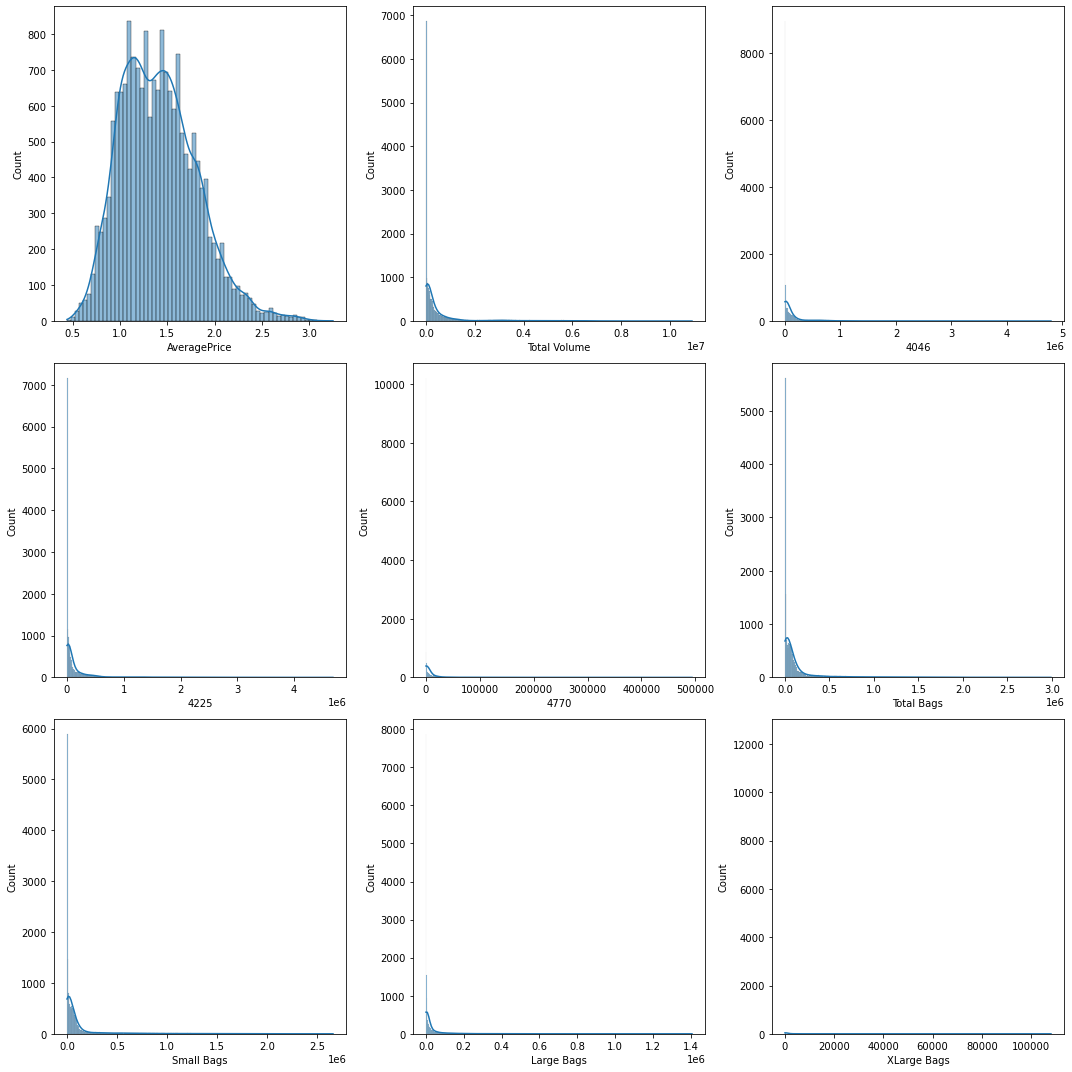

In [23]:
# Use histogram to see distribution

plt.figure(figsize=(15,15))

features = numerical

for i in range(0, len(features)):
    plt.subplot(3, len(features)//4 + 1, i+1)
    sns.histplot(x=df[features[i]], kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

#### Observation:

As seen on the plot, most of the data other than "AveragePrice" is in the lowest spectrum of the number.
Thus, columns other than AveragePrice will not be included in the machine learning algorithm, since it's also irrelevant for prediction. But it can be used to gain another insight.


### 2.2.6 Categorical Data Distribution

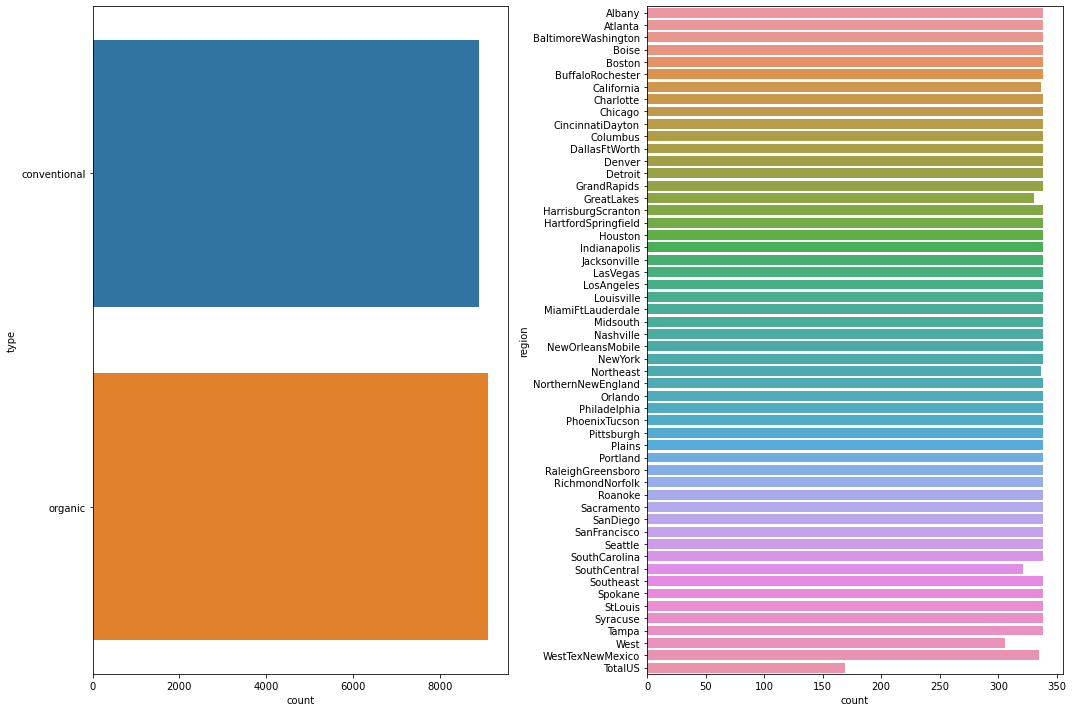

In [24]:
# Use bar chart to see categorical data distribution

plt.figure(figsize=(15,10))

features = categorical

for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(y=df[features[i]])
    plt.tight_layout()

#### Observation:

The data are more or less distributed equally between all categories except for TotalUS in 'region' column.
I assume that this category means the data in that row is from all of the US, not from a specific region.

### 2.2.7 Price and Volume Trend

Text(0.5, 0, 'Volume Trend')

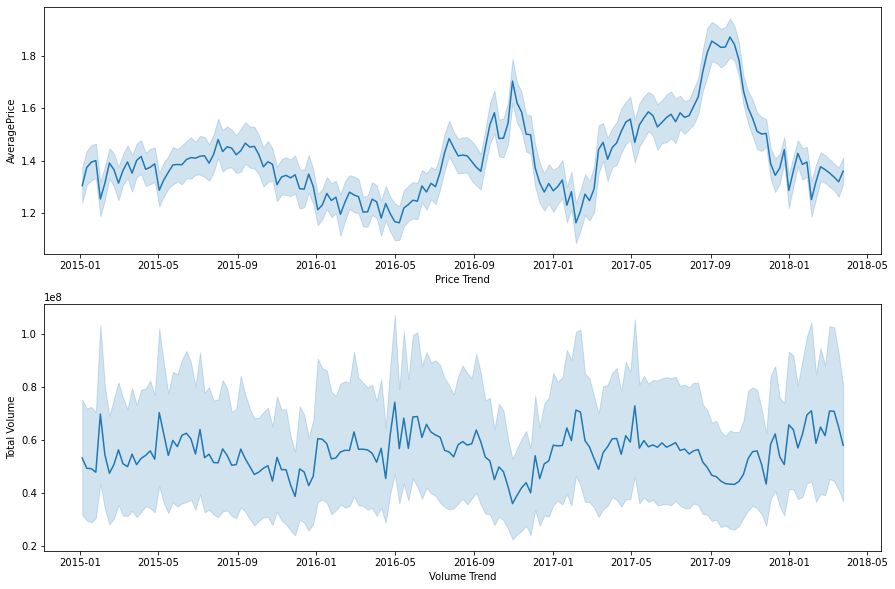

In [25]:
# Use line plot to see price and volume trend

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.lineplot(data=df, x='Date', y='AveragePrice', )
plt.xlabel('Price Trend')
plt.subplot(2,1,2)
sns.lineplot(data=df, x='Date', y='Total Volume', estimator='sum')
plt.xlabel('Volume Trend')

#### Observation:

1. The average price of avocado in the US was down in September 2015, but then going up since May 2016 until it came back down in October 2017.
2. The average volume of avocado purchases is decreasing while the price is going up, and vice versa.

## 2.3 Multivariate Analysis

### 2.3.1 Correlation

<AxesSubplot:>

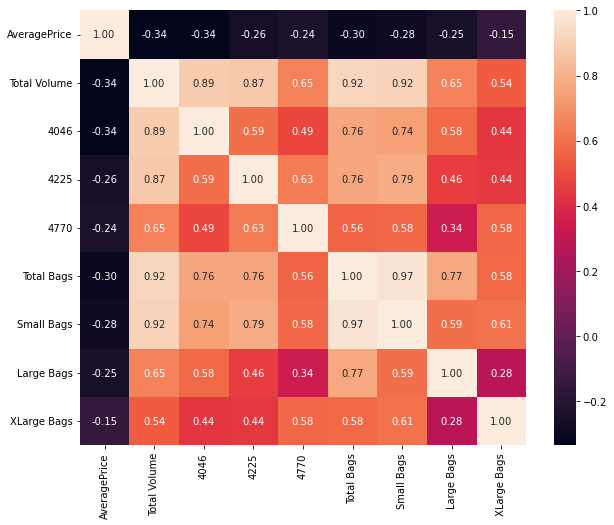

In [26]:
# Using heatmap to visualize correlation

correlation = df.corr()

plt.figure(figsize=(10,8))

sns.heatmap(correlation, annot=True, fmt='.2f')

#### Observation:

1. AveragePrice does not correlates with any other column.
2. Total Volume correlates with 4046, 4225, Total Bags, and Small bags. Means that an increase in total volume is dominated by avocado type 4046 and 4225, and was bought in small bags.
3. Total Bags highly correlates with small bags but not the other bags. Means that most purchase was in small bags.

### 2.3.2 Pairplot

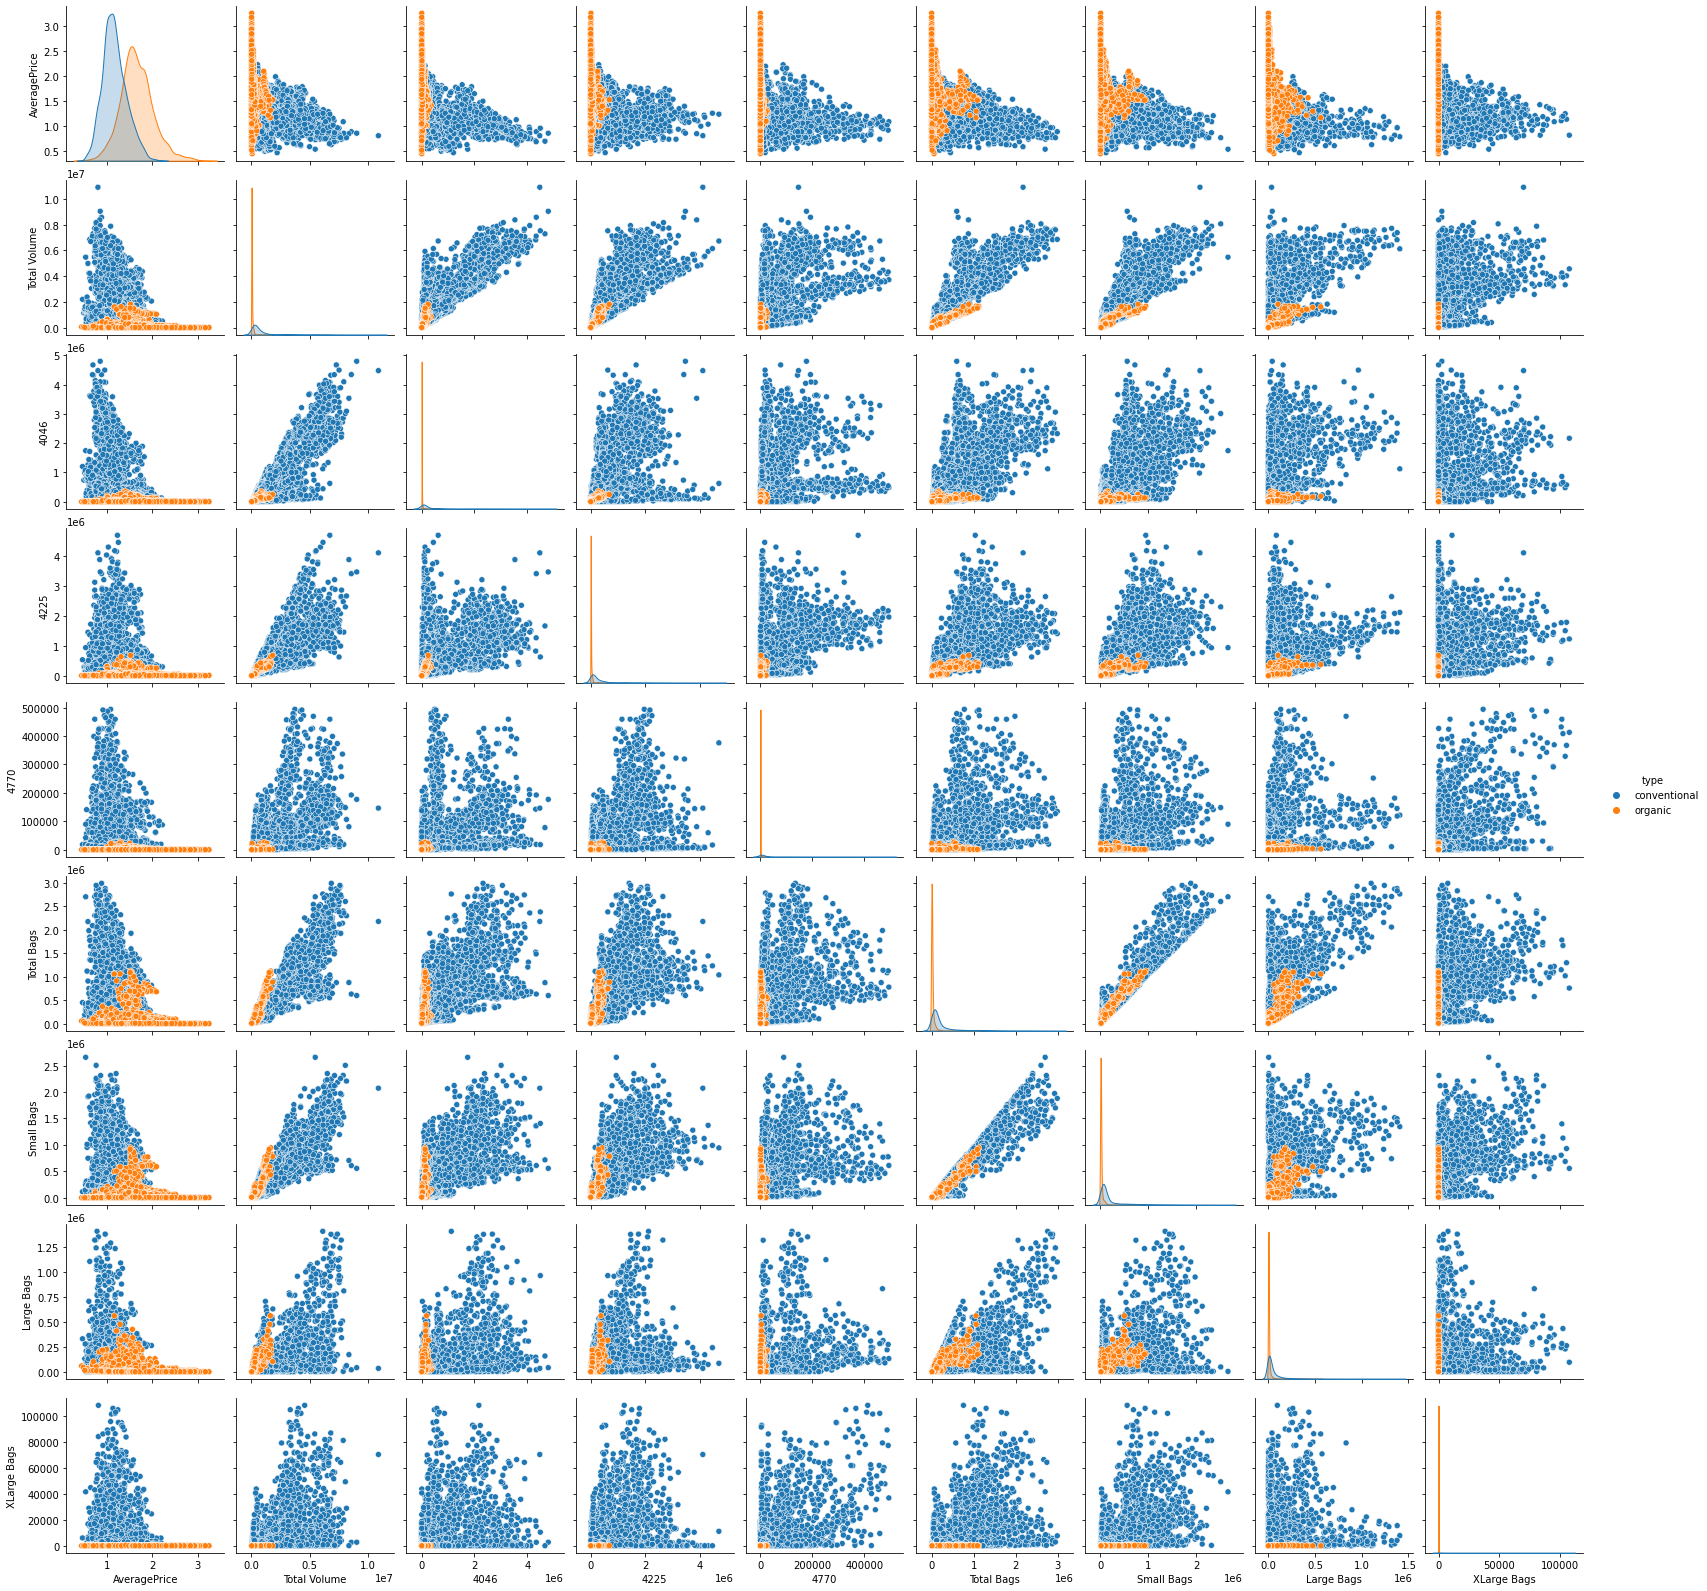

In [27]:
# Use pairplot on avocado types

sns.pairplot(df, hue='type')

#### Observation:

1. Organic avocado is more expensive than conventional.
2. Most purchases is organic avocado, yet was bought in small volume.

### 2.3.3 Deep Dive Analysis

Which region has the most expensive price, and which is the cheapest?

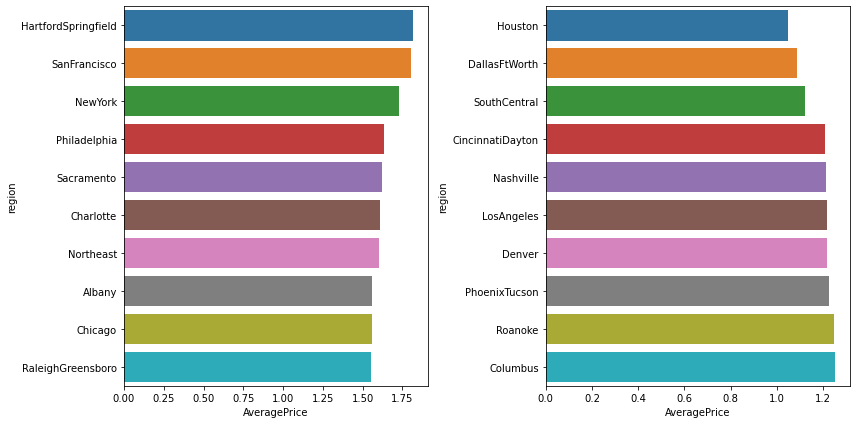

In [28]:
# use barplot to see relationship between price and region

regionGroupBy = df.groupby(['region'], as_index=False).mean()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(data=regionGroupBy.sort_values('AveragePrice', ascending=False).head(10),
            x='AveragePrice', y='region')

plt.subplot(1,2,2)
sns.barplot(data=regionGroupBy.sort_values('AveragePrice').head(10),
            x='AveragePrice', y='region')
plt.tight_layout()

For the 5 most expensive average avocado price from 2015-2018, how is their price trend?

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

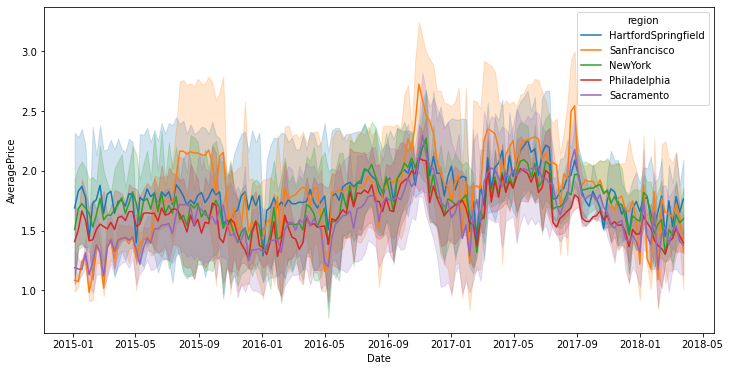

In [29]:
# Use lineplot to see trend of price by region

regions = ['HartfordSpringfield', 'SanFrancisco', 'NewYork', 'Philadelphia', 'Sacramento']

dfTop5Price = pd.DataFrame()

for i in regions:
    dfTop5Price = pd.concat([dfTop5Price,df[df['region'] == i]], ignore_index=True)

plt.figure(figsize=(12,6))
sns.lineplot(data=dfTop5Price,
            x='Date',
            y='AveragePrice',
            hue='region')

Which region has most avocado purchase, and which is least?

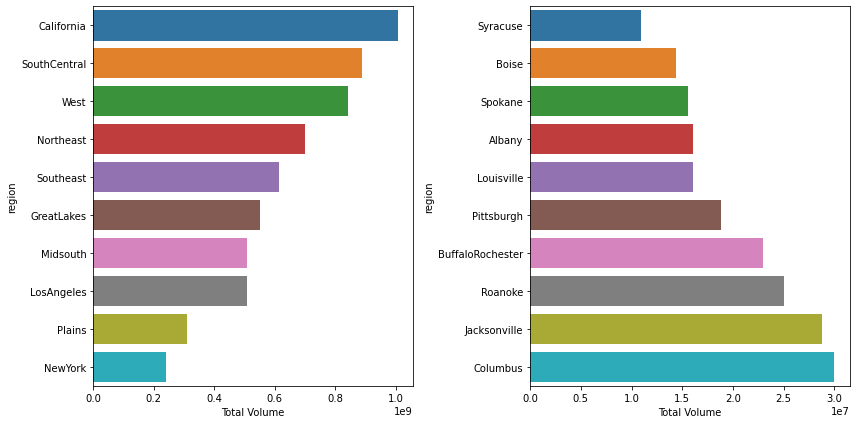

In [30]:
# use barplot to see relationship between total volume and region

regionGroupBy = df.groupby(['region'], as_index=False).sum()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(data=regionGroupBy.sort_values('Total Volume', ascending=False).head(10),
            x='Total Volume', y='region')

plt.subplot(1,2,2)
sns.barplot(data=regionGroupBy.sort_values('Total Volume').head(10),
            x='Total Volume', y='region')
plt.tight_layout()

For the top 5 region with most volume, how was the trend of the volume?

<AxesSubplot:xlabel='Date', ylabel='Total Volume'>

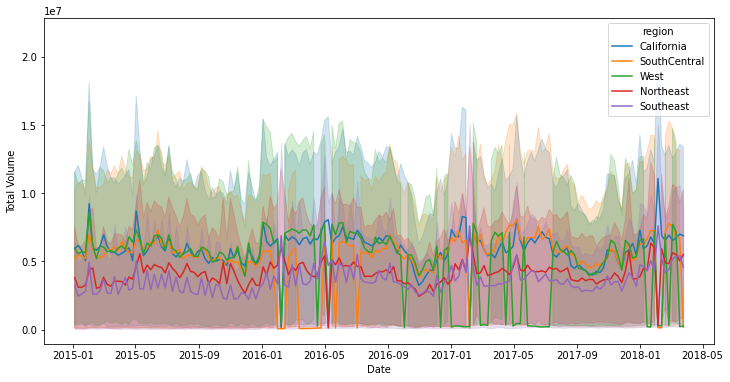

In [31]:
# Use lineplot to see trend of volume traded

regions = ['California', 'SouthCentral', 'West', 'Northeast', 'Southeast']

dfTop5Volume = pd.DataFrame()

for i in regions:
    dfTop5Volume = pd.concat([dfTop5Volume,df[df['region'] == i]], ignore_index=True)

plt.figure(figsize=(12,6))
sns.lineplot(data=dfTop5Volume,
            x='Date',
            y='Total Volume',
            hue='region',
            estimator = 'sum')

#### Observation:

1. Hartford Springfield has the most expensive avocado price.
2. California has the most total volume from the start.
3. The price in San Francisco was the most fluctuated.
4. There was some period where South Central and West didn't have any data of their volume.
5. Just like the overall trend, the volume and price since 2015 to 2018 didn't change much. 

# 3 Machine Learning Modeling

The machine learning model will be time series based. It will predict avocado price based on time.

## 3.1 Machine Learning Data Preprocessing

In [32]:
# Preparing the data for ML

dfml = df[['Date', 'AveragePrice', 'region', 'type']]

In [33]:
# Add lag feature

avoType = ['conventional', 'organic']

region = ['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']

dfml_new = pd.DataFrame()

for reg in region:
    for i in avoType:
        dfml = dfml.sort_values('Date')
        dfmlFilter = dfml[(dfml['region']==reg) & (dfml['type']==i)]
        dfmlFilter['Shift_AveragePrice'] = dfmlFilter['AveragePrice'].shift(-1)
        dfmlFilter['Time'] = np.arange(len(dfmlFilter.index))
        dfml_new = pd.concat([dfml_new, dfmlFilter], ignore_index=True)

dfml_new.dropna(inplace=True)
dfml_new.reset_index(inplace=True)
dfml_new.drop(['index','Date'], axis=1, inplace=True)
dfml_new

,AveragePrice,region,type,Shift_AveragePrice,Time
0,1.22,Albany,conventional,1.24,0
1,1.24,Albany,conventional,1.17,1
2,1.17,Albany,conventional,1.06,2
3,1.06,Albany,conventional,0.99,3
4,0.99,Albany,conventional,0.99,4
...,...,...,...,...,...
17907,1.56,WestTexNewMexico,organic,1.57,160
17908,1.57,WestTexNewMexico,organic,1.54,161
17909,1.54,WestTexNewMexico,organic,1.56,162
17910,1.56,WestTexNewMexico,organic,1.56,163


In [34]:
dfml_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17912 entries, 0 to 17911
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AveragePrice        17912 non-null  float64
 1   region              17912 non-null  object 
 2   type                17912 non-null  object 
 3   Shift_AveragePrice  17912 non-null  float64
 4   Time                17912 non-null  int32  
dtypes: float64(2), int32(1), object(2)
memory usage: 629.8+ KB


In [35]:
# One hot encoding the region
dfml_new = dfml_new.join(pd.get_dummies(dfml['region'], prefix='region'))
dfml_new.drop('region', axis=1, inplace=True)
dfml_new.head()

,AveragePrice,type,Shift_AveragePrice,Time,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.22,conventional,1.24,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.24,conventional,1.17,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.17,conventional,1.06,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.06,conventional,0.99,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.99,conventional,0.99,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
dfml_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17912 entries, 0 to 17911
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AveragePrice                17912 non-null  float64
 1   type                        17912 non-null  object 
 2   Shift_AveragePrice          17912 non-null  float64
 3   Time                        17912 non-null  int32  
 4   region_Albany               17682 non-null  float64
 5   region_Atlanta              17682 non-null  float64
 6   region_BaltimoreWashington  17682 non-null  float64
 7   region_Boise                17682 non-null  float64
 8   region_Boston               17682 non-null  float64
 9   region_BuffaloRochester     17682 non-null  float64
 10  region_California           17682 non-null  float64
 11  region_Charlotte            17682 non-null  float64
 12  region_Chicago              17682 non-null  float64
 13  region_CincinnatiDayton     176

In [37]:
# More cleaning because there's missing value

dfml_new.dropna(inplace=True)

In [38]:
# Binary encoding the type

type_enc = {
    'conventional' : 0,
    'organic' : 1
}

dfml_new['type'] = dfml_new['type'].map(type_enc)
dfml_new.head()

,AveragePrice,type,Shift_AveragePrice,Time,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.22,0,1.24,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.24,0,1.17,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.17,0,1.06,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.06,0,0.99,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.99,0,0.99,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Split Test Train Data

from sklearn.model_selection import train_test_split

feature = dfml_new.drop('AveragePrice', axis=1)
target = dfml_new['AveragePrice']
 
featureTrain, featureTest, targetTrain, targetTest = train_test_split(feature, target, test_size = 0.25, random_state = 42)

Data prepared

## 3.2 Linear Regression Model

The model will be a linear regression

In [40]:
# Import Linear Regression Library
from sklearn.linear_model import LinearRegression

# Model instantiation
linreg = LinearRegression()

# Model Training
xTrain = featureTrain.to_numpy()
yTrain = targetTrain.to_numpy()
yTrain = yTrain.reshape(len(yTrain,))

linreg.fit(xTrain,yTrain)

LinearRegression()

In [41]:
# Retrieve the coefficients

data = featureTrain
model = linreg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,0.175699
1,type,0.079282
2,Shift_AveragePrice,0.834029
3,Time,0.000209
4,region_Albany,0.020204
5,region_Atlanta,0.000776
6,region_BaltimoreWashington,0.016690
7,region_Boise,0.008026
8,region_Boston,0.001421
9,region_BuffaloRochester,0.011766


In [42]:
# Prepare prediction result on train data
xTrain = featureTrain.to_numpy()
yTrainPredict = linreg.predict(xTrain)

# ground truth target
yTrain = targetTrain.to_numpy()
yTrain = yTrain.reshape(len(yTrain),)


In [43]:
# Training Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(yTrain, yTrainPredict))))
print('MAE for training data is {}'.format(mean_absolute_error(yTrain, yTrainPredict)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(yTrain, yTrainPredict)))

RMSE for training data is 0.16357699753990712
MAE for training data is 0.11192666985864728
MAPE for training data is 0.08494864913719435


In [44]:
# Prepare prediction result on test data
xTest = featureTest.to_numpy()
yTestPredict = linreg.predict(xTest)

# ground truth target
yTest = targetTest.to_numpy()
yTest = yTest.reshape(len(yTest),)


In [45]:
# Testing Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(yTest, yTestPredict))))
print('MAE for testing data is {}'.format(mean_absolute_error(yTest, yTestPredict)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(yTest, yTestPredict)))

RMSE for testing data is 0.16464479189773065
MAE for testing data is 0.11321903214664648
MAPE for testing data is 0.08582717488694404


## 3.3 Model Evaluation

The standard deviation of prediction error is 0.16
On average, the prediction deviates AveragePrice for 0.11. In percentage, this is 8.5% deviation from the true number.

Though it requires another model to be compared.

# 4. Conclusion

1. Organic avocado is more expensive than conventional avocado
2. Increase in volume correlates with increase in sales in small bags. Which means most purchases are using small bags.
3. State with biggest volume is California.
4. State with the highest average price is Hartford Springfield.
5. Time series prediction of the avocado price using linear regression is achieved with RSME 8.5%

# 5. Reccomendation

1. Companies should stock more conventional avocado since most purchases are conventional avocadoes.
2. Companies should focus on selling 4046 and 4225 avocadoes because they're the most purchased avocadoes.